In [6]:
import cv2
import time
from copy import copy
from joblib import load
from skimage import io, util
from skimage.feature import hog

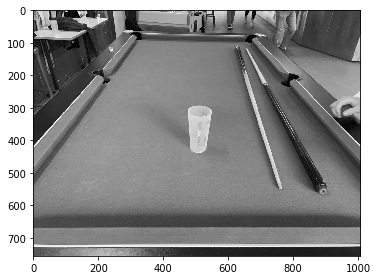

In [7]:
image_test = io.imread('dataset/train/images/pos/amagnero_pos_001.jpg', as_gray=True)
img = util.img_as_float(image_test)
shape = img.shape

clf = load('models/SVC_model_100_100_grey.joblib')

In [ ]:
# shape = (hauteur, largeur)
start = time.process_time()

shape_window = 100

test = copy(img)

detection = []

MAX_SHAPE = 400
SHAPE_INTERVAL = 5

WINDOW_INTERVAL = 5

detections = []

for cur_shape in range (shape_window, MAX_SHAPE, SHAPE_INTERVAL):
    print('SHAPE', cur_shape)
    cur_image = cv2.resize(test, (cur_shape, cur_shape))
    for i in range(0, cur_shape-shape_window, WINDOW_INTERVAL):
        for j in range(0, cur_shape-shape_window, WINDOW_INTERVAL):
            image_to_test = cur_image[i:i+shape_window, j:j+shape_window]
            prediction = clf.decision_function([hog(image_to_test)])
            if prediction > 0.8:
                detections.append(image_to_test)
                print('DETECTION', prediction[0])

end = time.process_time()

print(end - start)